## Escuela Politécnica Nacional
## Métodos Numéricos
## Integrantes: 
### - Jhonn Saeteros
### - Christian Ayala

# Grafique la trayectoria de los siguientes sistemas de ecuaciones

# 1) $x_1+x_2=7$
# 2) $-2x_1+5x_2=0$
# 3) $x_0=(0,0)$
# 4) $x_0=(5,2)$
# 5) $x_1+x_2=6$
# 6) $-2x_1+x_2=0$

In [9]:
from iterative_methods import gauss_jacobi, gauss_seidel
import numpy as np
import matplotlib.pyplot as plt

# Sistema
A = np.array([[1, 1], [-2, 5]], dtype=float)
b = np.array([[7], [0]], dtype=float)

# Condiciones iniciales
x0_list = [np.array([[0.0], [0.0]]), np.array([[5.0], [2.0]])]

# Parámetros
tol = 1e-5
max_iter = 25


[07-15 17:38:54][INFO] i= 0 x: [[5. 2.]]
[07-15 17:38:54][INFO] i= 0 x: [[5. 2.]]


C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:59: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:59: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


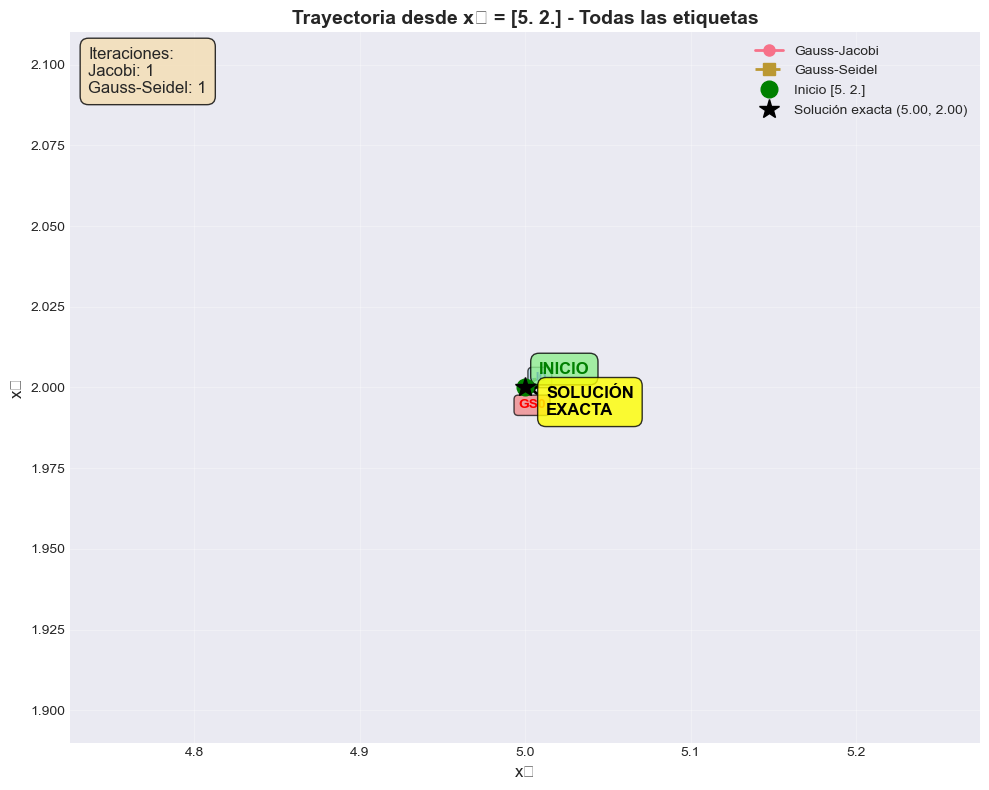


RESULTADOS PARA: Todas las etiquetas
Punto inicial: [5. 2.]
Solución exacta: [5. 2.]

Gauss-Jacobi:
  Iteraciones: 1
  Solución final: [5. 2.]
  Error: 0.00000000

Gauss-Seidel:
  Iteraciones: 1
  Solución final: [5. 2.]
  Error: 0.00000000

📍 TRAYECTORIA JACOBI:
  J0: (5.0000, 2.0000)

📍 TRAYECTORIA GAUSS-SEIDEL:
  GS0: (5.0000, 2.0000)
[07-15 17:38:54][INFO] i= 0 x: [[5. 2.]]
[07-15 17:38:54][INFO] i= 0 x: [[5. 2.]]


C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:139: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:139: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:139: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


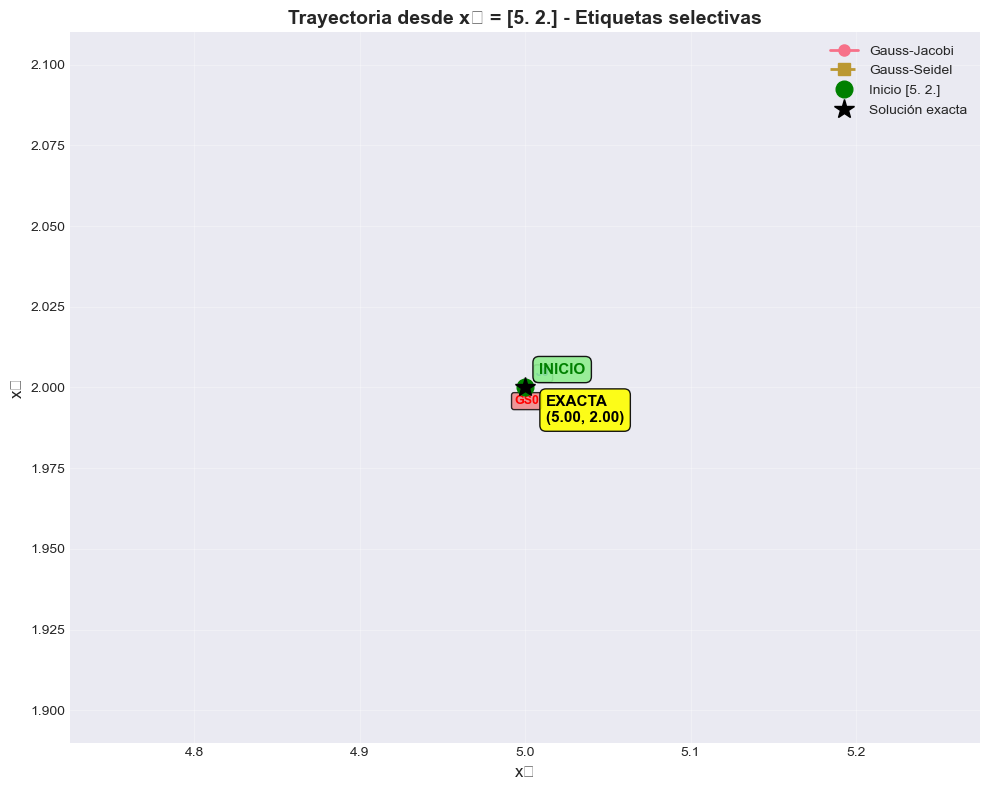


[5. 2.] => Gauss-Jacobi → [5. 2.]
[5. 2.] => Gauss-Seidel → [5. 2.]


In [10]:
def resolver_y_graficar(x0, nombre):
    # Ejecutar ambos métodos
    sol_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    sol_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

    # Convertir trayectoria a (n_iter, 2)
    tray_jacobi = np.concatenate(tray_jacobi, axis=1).T
    tray_seidel = np.concatenate(tray_seidel, axis=1).T

    # Gráfico
    plt.figure(figsize=(10, 8))
    
    # Graficar trayectorias
    plt.plot(tray_jacobi[:, 0], tray_jacobi[:, 1], 'o-', label='Gauss-Jacobi', linewidth=2, markersize=8)
    plt.plot(tray_seidel[:, 0], tray_seidel[:, 1], 's--', label='Gauss-Seidel', linewidth=2, markersize=8)
    
    # Agregar etiquetas a los puntos de Jacobi
    for i, (x, y) in enumerate(tray_jacobi):
        plt.annotate(f'J{i}', (x, y), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold', color='blue',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    # Agregar etiquetas a los puntos de Gauss-Seidel
    for i, (x, y) in enumerate(tray_seidel):
        plt.annotate(f'GS{i}', (x, y), 
                    xytext=(-5, -15), textcoords='offset points',
                    fontsize=10, fontweight='bold', color='red',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))
    
    # Marcar punto inicial con etiqueta especial
    plt.plot(x0[0], x0[1], 'go', markersize=12, label=f'Inicio {x0.ravel()}', zorder=5)
    plt.annotate('INICIO', (x0[0], x0[1]), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=12, fontweight='bold', color='green',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    
    # Calcular y marcar solución exacta
    sol_exacta = np.linalg.solve(A, b)
    plt.plot(sol_exacta[0], sol_exacta[1], 'k*', markersize=15, label=f'Solución exacta ({sol_exacta[0]:.2f}, {sol_exacta[1]:.2f})', zorder=5)
    plt.annotate('SOLUCIÓN\nEXACTA', (sol_exacta[0], sol_exacta[1]), 
                xytext=(15, -20), textcoords='offset points',
                fontsize=12, fontweight='bold', color='black',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='black', lw=2))
    
    # Agregar información de convergencia en el gráfico
    info_text = f"Iteraciones:\nJacobi: {len(tray_jacobi)}\nGauss-Seidel: {len(tray_seidel)}"
    plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.8))
    
    plt.title(f"Trayectoria desde x₀ = {x0.ravel()} - {nombre}", fontsize=14, fontweight='bold')
    plt.xlabel("x₁", fontsize=12)
    plt.ylabel("x₂", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # Mostrar información detallada
    print(f"\n{'='*60}")
    print(f"RESULTADOS PARA: {nombre}")
    print(f"{'='*60}")
    print(f"Punto inicial: {x0.ravel()}")
    print(f"Solución exacta: {sol_exacta}")
    print(f"\nGauss-Jacobi:")
    print(f"  Iteraciones: {len(tray_jacobi)}")
    print(f"  Solución final: {sol_jacobi.ravel()}")
    print(f"  Error: {np.linalg.norm(sol_jacobi.ravel() - sol_exacta):.8f}")
    print(f"\nGauss-Seidel:")
    print(f"  Iteraciones: {len(tray_seidel)}")
    print(f"  Solución final: {sol_seidel.ravel()}")
    print(f"  Error: {np.linalg.norm(sol_seidel.ravel() - sol_exacta):.8f}")
    
    # Mostrar trayectoria punto por punto
    print(f"\n📍 TRAYECTORIA JACOBI:")
    for i, punto in enumerate(tray_jacobi):
        print(f"  J{i}: ({punto[0]:.4f}, {punto[1]:.4f})")
    
    print(f"\n📍 TRAYECTORIA GAUSS-SEIDEL:")
    for i, punto in enumerate(tray_seidel):
        print(f"  GS{i}: ({punto[0]:.4f}, {punto[1]:.4f})")

# Versión alternativa con etiquetas más limpias (solo algunas iteraciones)
def resolver_y_graficar_limpio(x0, nombre, mostrar_cada=1):
    # Ejecutar ambos métodos
    sol_jacobi, tray_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    sol_seidel, tray_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

    # Convertir trayectoria a (n_iter, 2)
    tray_jacobi = np.concatenate(tray_jacobi, axis=1).T
    tray_seidel = np.concatenate(tray_seidel, axis=1).T

    # Gráfico
    plt.figure(figsize=(10, 8))
    
    # Graficar trayectorias
    plt.plot(tray_jacobi[:, 0], tray_jacobi[:, 1], 'o-', label='Gauss-Jacobi', linewidth=2, markersize=8)
    plt.plot(tray_seidel[:, 0], tray_seidel[:, 1], 's--', label='Gauss-Seidel', linewidth=2, markersize=8)
    
    # Agregar etiquetas solo a algunos puntos para mayor claridad
    for i, (x, y) in enumerate(tray_jacobi):
        if i % mostrar_cada == 0 or i == len(tray_jacobi) - 1:  # Mostrar cada N puntos y el último
            plt.annotate(f'J{i}', (x, y), 
                        xytext=(8, 8), textcoords='offset points',
                        fontsize=9, fontweight='bold', color='blue',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.8))
    
    for i, (x, y) in enumerate(tray_seidel):
        if i % mostrar_cada == 0 or i == len(tray_seidel) - 1:  # Mostrar cada N puntos y el último
            plt.annotate(f'GS{i}', (x, y), 
                        xytext=(-8, -12), textcoords='offset points',
                        fontsize=9, fontweight='bold', color='red',
                        bbox=dict(boxstyle='round,pad=0.2', facecolor='lightcoral', alpha=0.8))
    
    # Marcar punto inicial
    plt.plot(x0[0], x0[1], 'go', markersize=12, label=f'Inicio {x0.ravel()}', zorder=5)
    plt.annotate('INICIO', (x0[0], x0[1]), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=11, fontweight='bold', color='green',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', alpha=0.9))
    
    # Calcular y marcar solución exacta
    sol_exacta = np.linalg.solve(A, b)
    plt.plot(sol_exacta[0], sol_exacta[1], 'k*', markersize=15, label=f'Solución exacta', zorder=5)
    plt.annotate(f'EXACTA\n({sol_exacta[0]:.2f}, {sol_exacta[1]:.2f})', 
                (sol_exacta[0], sol_exacta[1]), 
                xytext=(15, -25), textcoords='offset points',
                fontsize=11, fontweight='bold', color='black',
                bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', alpha=0.9))
    
    plt.title(f"Trayectoria desde x₀ = {x0.ravel()} - {nombre}", fontsize=14, fontweight='bold')
    plt.xlabel("x₁", fontsize=12)
    plt.ylabel("x₂", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Mostrar solución
    print(f"\n{x0.ravel()} => Gauss-Jacobi → {sol_jacobi.ravel()}")
    print(f"{x0.ravel()} => Gauss-Seidel → {sol_seidel.ravel()}")

# Ejemplo de uso
if __name__ == "__main__":
    # Definir sistema de ejemplo
    A = np.array([[1, 1], [-2, 5]], dtype=float)
    b = np.array([7, 0], dtype=float)
    x0 = np.array([[5], [2]], dtype=float)
    tol = 1e-6
    max_iter = 50
    
    # Usar la función con todas las etiquetas
    resolver_y_graficar(x0, "Todas las etiquetas")
    
    # Usar la función con etiquetas cada 2 puntos (más limpio)
    resolver_y_graficar_limpio(x0, "Etiquetas selectivas", mostrar_cada=2)


[07-15 17:38:55][INFO] i= 0 x: [[0. 0.]]
[07-15 17:38:55][INFO] i= 1 x: [[7. 0.]]
[07-15 17:38:55][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:38:55][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:38:55][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:38:55][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:38:55][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:38:55][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:38:55][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:38:55][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:38:55][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:38:55][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:38:55][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:38:55][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:38:55][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:38:55][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:38:55][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:38:55][INFO] i= 17 x: [[5.00131072 1.99868928]]
[07-15 17:38:55][INFO] i= 18 x: [[5.00131072 2.00052429]]
[07-15 17:38:55][INFO] i= 19 x: [[4.99947571 2.00052

C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:59: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_19068\3603300791.py:59: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


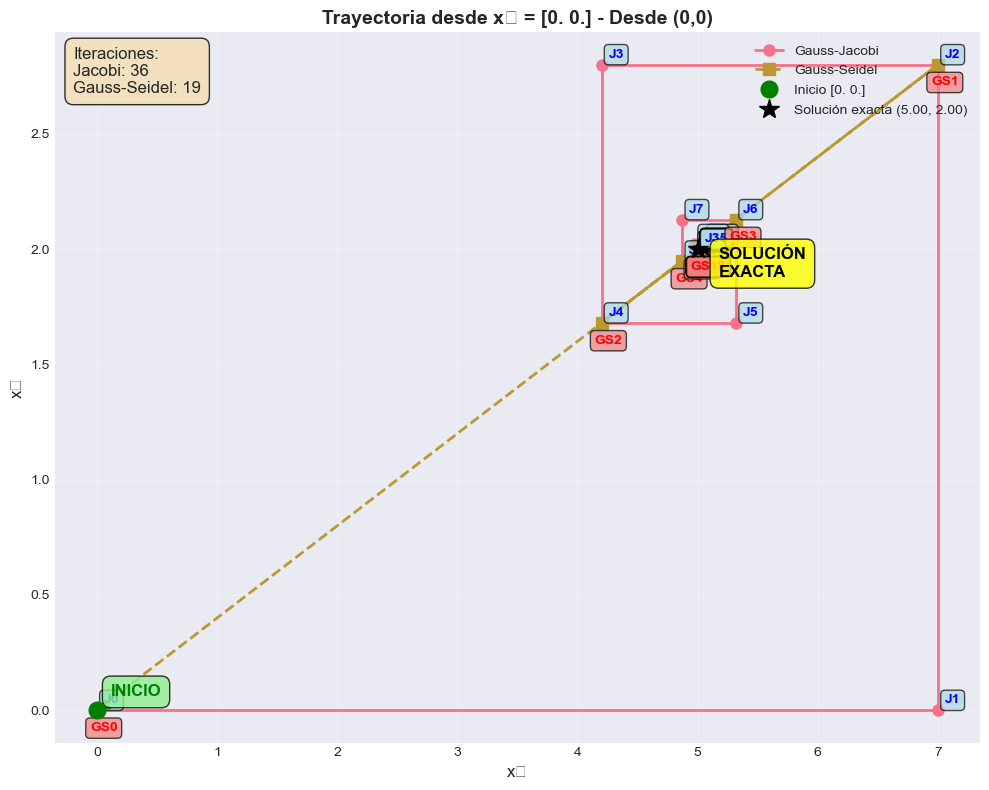


RESULTADOS PARA: Desde (0,0)
Punto inicial: [0. 0.]
Solución exacta: [5. 2.]

Gauss-Jacobi:
  Iteraciones: 36
  Solución final: [4.99999966 1.99999986]
  Error: 0.00000037

Gauss-Seidel:
  Iteraciones: 19
  Solución final: [5.00000014 2.00000005]
  Error: 0.00000015

📍 TRAYECTORIA JACOBI:
  J0: (0.0000, 0.0000)
  J1: (7.0000, 0.0000)
  J2: (7.0000, 2.8000)
  J3: (4.2000, 2.8000)
  J4: (4.2000, 1.6800)
  J5: (5.3200, 1.6800)
  J6: (5.3200, 2.1280)
  J7: (4.8720, 2.1280)
  J8: (4.8720, 1.9488)
  J9: (5.0512, 1.9488)
  J10: (5.0512, 2.0205)
  J11: (4.9795, 2.0205)
  J12: (4.9795, 1.9918)
  J13: (5.0082, 1.9918)
  J14: (5.0082, 2.0033)
  J15: (4.9967, 2.0033)
  J16: (4.9967, 1.9987)
  J17: (5.0013, 1.9987)
  J18: (5.0013, 2.0005)
  J19: (4.9995, 2.0005)
  J20: (4.9995, 1.9998)
  J21: (5.0002, 1.9998)
  J22: (5.0002, 2.0001)
  J23: (4.9999, 2.0001)
  J24: (4.9999, 2.0000)
  J25: (5.0000, 2.0000)
  J26: (5.0000, 2.0000)
  J27: (5.0000, 2.0000)
  J28: (5.0000, 2.0000)
  J29: (5.0000, 2.0000)

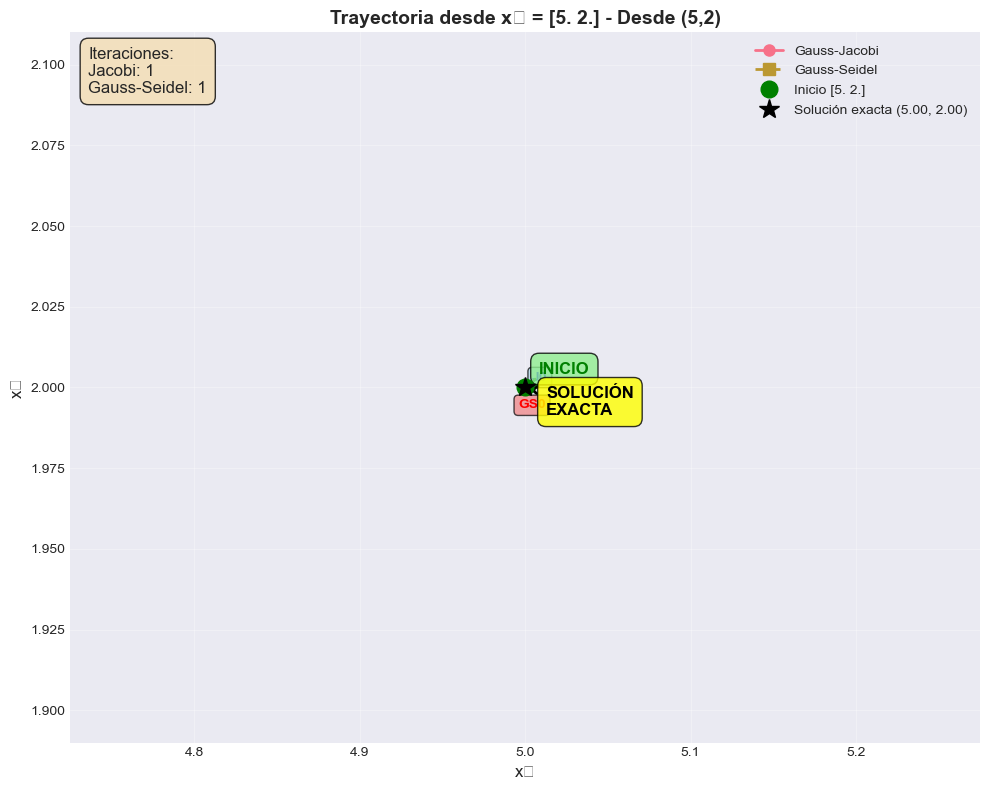


RESULTADOS PARA: Desde (5,2)
Punto inicial: [5. 2.]
Solución exacta: [5. 2.]

Gauss-Jacobi:
  Iteraciones: 1
  Solución final: [5. 2.]
  Error: 0.00000000

Gauss-Seidel:
  Iteraciones: 1
  Solución final: [5. 2.]
  Error: 0.00000000

📍 TRAYECTORIA JACOBI:
  J0: (5.0000, 2.0000)

📍 TRAYECTORIA GAUSS-SEIDEL:
  GS0: (5.0000, 2.0000)


In [11]:
resolver_y_graficar(x0_list[0], "Desde (0,0)")
resolver_y_graficar(x0_list[1], "Desde (5,2)")




## ejercicio 2

In [12]:
x0_list = [
    np.array([[0.0], [0.0]]),
    np.array([[5.0], [2.0]])
]


In [13]:
# Sistema modificado
A = np.array([[1, 1], [-2, 1]], dtype=float)
b = np.array([[6], [0]], dtype=float)


[07-15 17:38:57][INFO] i= 0 x: [[0. 0.]]
[07-15 17:38:57][INFO] i= 1 x: [[6. 0.]]
[07-15 17:38:57][INFO] i= 2 x: [[ 6. 12.]]
[07-15 17:38:57][INFO] i= 3 x: [[-6. 12.]]
[07-15 17:38:57][INFO] i= 4 x: [[ -6. -12.]]
[07-15 17:38:57][INFO] i= 5 x: [[ 18. -12.]]
[07-15 17:38:57][INFO] i= 6 x: [[18. 36.]]
[07-15 17:38:57][INFO] i= 7 x: [[-30.  36.]]
[07-15 17:38:57][INFO] i= 8 x: [[-30. -60.]]
[07-15 17:38:57][INFO] i= 9 x: [[ 66. -60.]]
[07-15 17:38:57][INFO] i= 10 x: [[ 66. 132.]]
[07-15 17:38:57][INFO] i= 11 x: [[-126.  132.]]
[07-15 17:38:57][INFO] i= 12 x: [[-126. -252.]]
[07-15 17:38:57][INFO] i= 13 x: [[ 258. -252.]]
[07-15 17:38:57][INFO] i= 14 x: [[258. 516.]]
[07-15 17:38:57][INFO] i= 15 x: [[-510.  516.]]
[07-15 17:38:57][INFO] i= 16 x: [[ -510. -1020.]]
[07-15 17:38:57][INFO] i= 17 x: [[ 1026. -1020.]]
[07-15 17:38:57][INFO] i= 18 x: [[1026. 2052.]]
[07-15 17:38:57][INFO] i= 19 x: [[-2046.  2052.]]
[07-15 17:38:57][INFO] i= 20 x: [[-2046. -4092.]]
[07-15 17:38:57][INFO] i= 21 x: 

TypeError: unsupported format string passed to numpy.ndarray.__format__

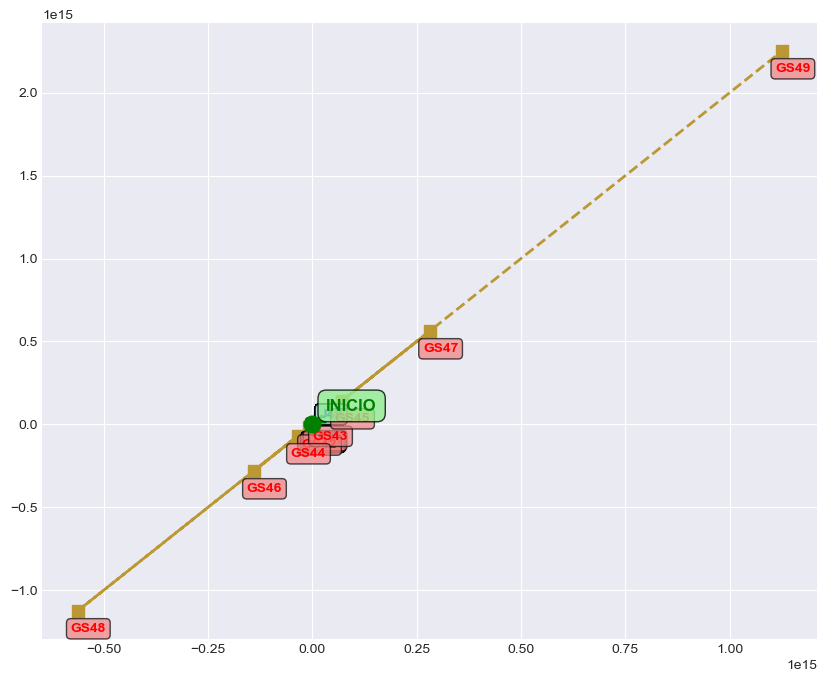

In [14]:
resolver_y_graficar(x0_list[0], "Desde (0,0)")
resolver_y_graficar(x0_list[1], "Desde (5,2)")
